In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np


In [2]:
data = pd.read_csv('/home/suraj/ClickUp/Jan-Feb/DataScience_ML_DL_Projects/MachineLearning/Timeseries_forecast_AR_model/data/mpi_roof.csv')
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),CO2 (ppm)
0,01.07.2022 00:10:00,984.33,22.42,296.91,19.72,84.70,27.17,23.01,4.16,14.67,...,1.18,1.63,219.9,0.0,0.0,0.00,0.00,0.00,31.74,447.2
1,01.07.2022 00:20:00,984.36,22.02,296.50,19.72,86.80,26.51,23.01,3.50,14.67,...,1.02,1.58,222.4,0.0,0.0,0.00,0.00,0.00,31.63,445.6
2,01.07.2022 00:30:00,984.35,21.77,296.25,19.68,87.90,26.11,22.95,3.16,14.63,...,0.99,1.64,191.0,0.0,0.0,0.00,0.00,0.00,31.52,443.1
3,01.07.2022 00:40:00,984.27,22.00,296.49,19.47,85.60,26.48,22.67,3.81,14.45,...,1.45,2.40,211.8,0.0,0.0,0.00,0.00,0.00,31.44,443.4
4,01.07.2022 00:50:00,984.36,22.23,296.71,19.40,84.00,26.86,22.56,4.30,14.38,...,1.66,2.59,211.9,0.0,0.0,0.00,0.00,0.00,31.37,444.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,08.01.2023 12:10:00,980.48,8.49,283.23,4.85,77.82,11.10,8.64,2.46,5.50,...,3.71,4.79,207.6,0.0,0.0,129.13,256.55,278.35,17.39,431.1
27496,08.01.2023 12:20:00,980.32,8.57,283.33,4.91,77.68,11.16,8.67,2.49,5.52,...,4.57,6.58,202.2,0.0,0.0,99.55,199.69,214.84,17.49,430.7
27497,08.01.2023 12:30:00,980.21,8.57,283.34,4.96,77.97,11.16,8.70,2.46,5.54,...,3.71,6.80,188.7,0.0,0.0,109.17,218.54,235.98,17.56,431.0
27498,08.01.2023 12:40:00,980.00,8.50,283.28,4.93,78.19,11.11,8.69,2.42,5.53,...,3.80,5.23,183.9,0.0,0.0,123.51,245.05,274.17,17.61,431.7


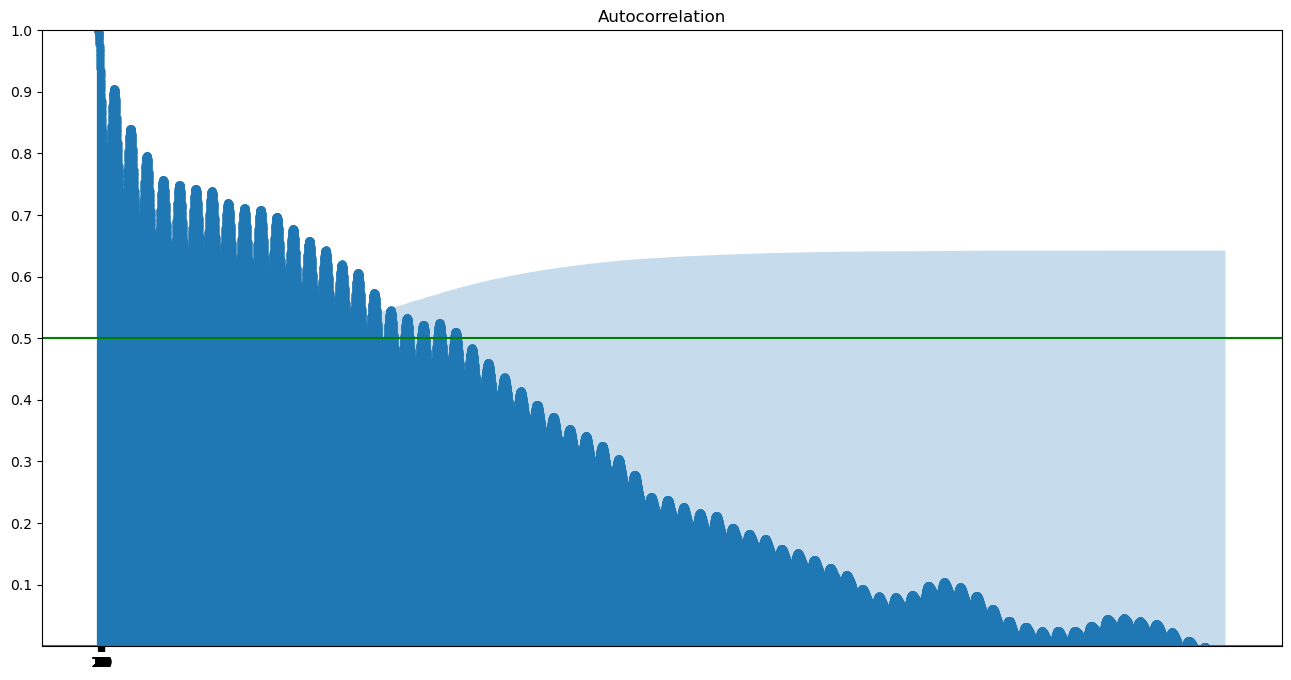

In [7]:

fig, ax = plt.subplots(figsize=(16,8))
plot_acf(data['T (degC)'], lags=10000, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

let's find out the last lag that goes above green threshold line to create our AR model.

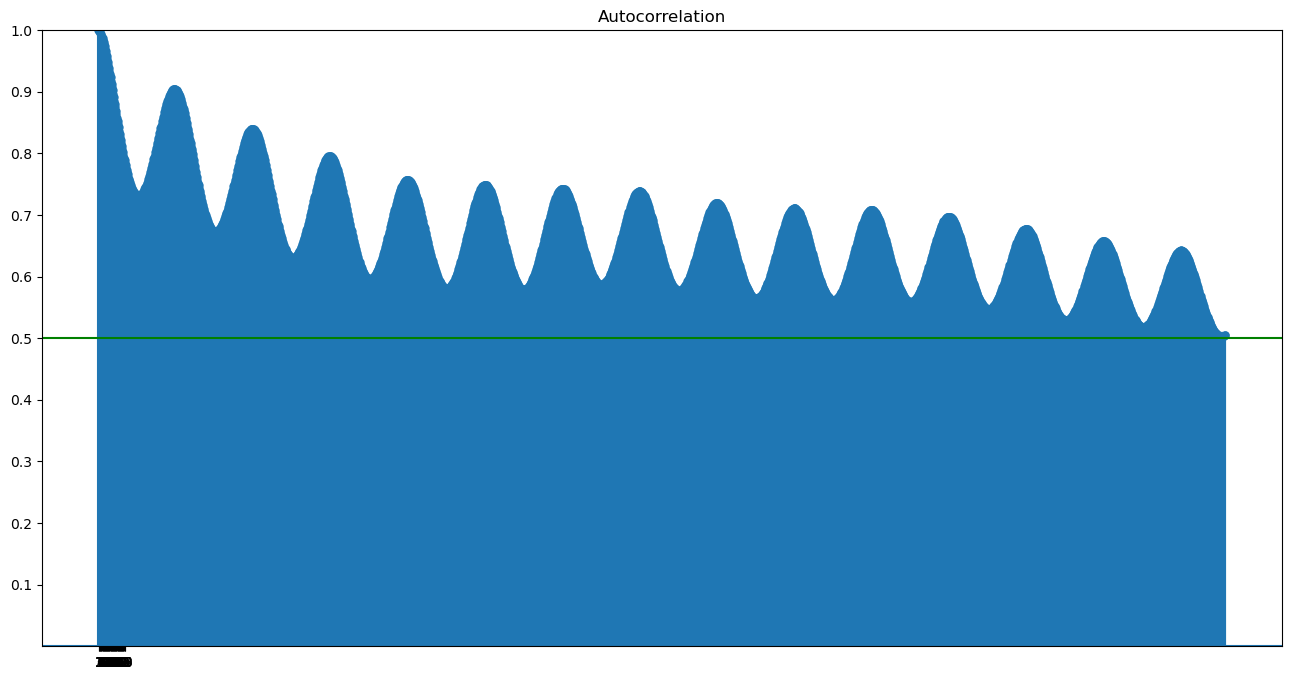

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(data['T (degC)'], lags=2100, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

looks, like lag = 2100 works as it's the last lag above threshold.

In [3]:
# converting temperature in degree celsius into a list 
timeseries_dataset = data['T (degC)'].to_list()
print(timeseries_dataset)

[22.42, 22.02, 21.77, 22.0, 22.23, 22.27, 22.39, 22.49, 22.25, 22.3, 22.27, 22.16, 21.96, 21.49, 21.65, 22.22, 22.05, 21.72, 21.59, 21.45, 20.59, 19.83, 19.14, 18.74, 18.68, 18.75, 18.67, 18.33, 18.05, 17.81, 17.73, 17.73, 17.79, 17.74, 17.71, 17.63, 17.66, 17.76, 17.73, 17.51, 17.36, 17.39, 17.52, 17.51, 17.35, 17.16, 17.03, 16.98, 16.79, 16.51, 16.02, 15.49, 15.32, 15.22, 14.98, 14.76, 14.7, 14.72, 14.94, 15.01, 15.01, 15.05, 15.18, 15.26, 15.24, 15.5, 15.61, 15.43, 15.34, 15.33, 15.56, 15.76, 15.86, 16.07, 16.23, 15.74, 15.26, 15.16, 15.02, 15.09, 15.45, 15.39, 15.17, 14.97, 14.91, 15.07, 15.2, 15.21, 15.19, 15.21, 15.23, 15.26, 15.33, 15.39, 15.37, 15.17, 15.19, 15.27, 15.43, 15.75, 15.67, 15.5, 15.32, 15.34, 15.43, 15.81, 16.26, 16.85, 17.28, 17.47, 17.98, 18.05, 18.0, 18.15, 17.92, 17.39, 16.7, 16.31, 16.07, 15.72, 15.49, 15.45, 15.69, 15.46, 15.22, 14.8, 14.75, 14.76, 14.55, 14.43, 14.27, 14.1, 14.0, 13.87, 13.67, 13.48, 13.57, 13.58, 13.51, 13.56, 13.51, 13.34, 13.0, 12.8, 12.7

In [14]:
# splitting the dat into training and test datasets
train_data = timeseries_dataset[:-5]
test_data = timeseries_dataset[-5:]

In [15]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train_data, lags=2100).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                27495
Model:                  AutoReg(2100)   Log Likelihood                5909.656
Method:               Conditional MLE   S.D. of innovations              0.192
Date:                Sun, 08 Jan 2023   AIC                             -3.138
Time:                        18:21:32   BIC                             -2.464
Sample:                          2100   HQIC                            -2.920
                                27495                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0019      0.002      0.805      0.421      -0.003       0.007
y.L1           1.4494      0.006    230.989      0.000       1.437       1.462
y.L2          -0.6233      0.011    -56.415      0.000      -0.645      -0.602
y.L3           0.2598      0.012     22.165      0.000       0.237       0.283
y.L4          -0.0769      0.012     -6.505      0.000      -0.100      -0.054
y.L5           0.0405      0.012      3.423      0.001       0.017       0.064
y.L6          -0.0139      0.012     -1.175      0.240      -0.037       0.009
y.L7          -0.0307      0.012     -2.598      0.009      -0.054      -0.008
y.L8           0.0381      0.012      3.215      0.001       0.015       0.061
y.L9          -0.0395      0.012     -3.334      0.001      -0.063      -0.016
y.L10          0.0140      0.012      1.184      0.237      -0.009       0.037
y.L11          0.0012      0.012      0.103      0.918      -0.022       0.024
y.L12         -0.0211      0.012     -1.781      0.075      -0.044       0.002
y.L13          0.0247      0.012      2.091      0.037       0.002       0.048
y.L14         -0.0273      0.012     -2.304      0.021      -0.050      -0.004
y.L15          0.0183      0.012      1.546      0.122      -0.005       0.041
y.L16         -0.0100      0.012     -0.846      0.398      -0.033       0.013
y.L17         -0.0078      0.012     -0.656      0.512      -0.031       0.015
y.L18          0.0193      0.012      1.634      0.102      -0.004       0.043
y.L19         -0.0132      0.012     -1.116      0.264      -0.036       0.010
y.L20         -0.0175      0.012     -1.475      0.140      -0.041       0.006
y.L21          0.0210      0.012      1.776      0.076      -0.002       0.044
y.L22         -0.0117      0.012     -0.986      0.324      -0.035       0.012
y.L23         -0.0025      0.012     -0.213      0.831      -0.026       0.021
y.L24          0.0062      0.012      0.524      0.601      -0.017       0.029
y.L25         -0.0006      0.012     -0.049      0.961      -0.024       0.023
y.L26         -0.0070      0.012     -0.592      0.554      -0.030       0.016
y.L27          0.0110      0.012      0.929      0.353      -0.012       0.034
y.L28          0.0041      0.012      0.347      0.729      -0.019       0.027
y.L29         -0.0088      0.012     -0.746      0.456      -0.032       0.014
y.L30         -0.0107      0.012     -0.900      0.368      -0.034       0.013
y.L31          0.0046      0.012      0.386      0.700      -0.019       0.028
y.L32          0.0076      0.012      0.642      0.521      -0.016       0.031
y.L33         -0.0009      0.012     -0.078      0.938      -0.024       0.022
y.L34         -0.0078      0.012     -0.656      0.512      -0.031       0.015
y.L35         -0.0061      0.012     -0.519      0.604      -0.029       0.017
y.L36          0.0281      0.012      2.378      0.017       0.005       0.051
y.L37         -0.0286      0.012     -2.420      0.016      -0.052      -0.005
y.

In [30]:
f = 20
forecasts = model.predict()

In [31]:
print(forecasts)

[20.67796865 19.96751912 20.01754602 ...  8.23845573  8.3418103
  8.39444549]


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_data, forecasts))